C:\Users\lenovo\AppData\Local\Temp\ipykernel_14012\1492515875.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


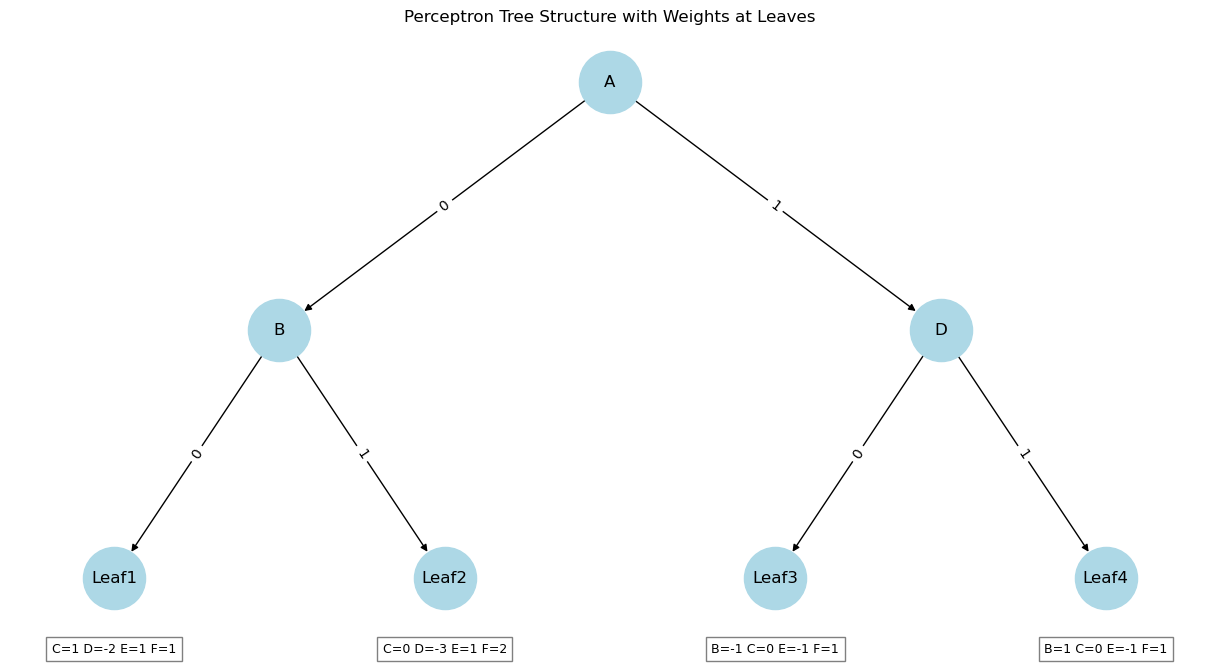

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Construct the decision tree with perceptron leaves
G = nx.DiGraph()

# Add internal decision nodes
G.add_node("A")
G.add_node("B")
G.add_node("D")

# Add edges from decision nodes
G.add_edge("A", "B", label="0")
G.add_edge("A", "D", label="1")
G.add_edge("B", "Leaf1", label="0")
G.add_edge("B", "Leaf2", label="1")
G.add_edge("D", "Leaf3", label="0")
G.add_edge("D", "Leaf4", label="1")

# Position of nodes for drawing
pos = {
    "A": (0, 2),
    "B": (-2, 1),
    "D": (2, 1),
    "Leaf1": (-3, 0),
    "Leaf2": (-1, 0),
    "Leaf3": (1, 0),
    "Leaf4": (3, 0)
}

# Perceptron weights shown in each leaf
leaf_weights = {
    "Leaf1": "C=1 D=-2 E=1 F=1",
    "Leaf2": "C=0 D=-3 E=1 F=2",
    "Leaf3": "B=-1 C=0 E=-1 F=1",
    "Leaf4": "B=1 C=0 E=-1 F=1"
}

# Draw the graph
plt.figure(figsize=(12, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12)

# Edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Annotate leaves with weights
for leaf, text in leaf_weights.items():
    x, y = pos[leaf]
    plt.text(x, y - 0.3, text, ha='center', fontsize=9, bbox=dict(facecolor='white', edgecolor='gray'))

plt.title("Perceptron Tree Structure with Weights at Leaves")
plt.axis('off')
plt.tight_layout()
plt.show()


In [2]:
import numpy as np

# Input vector
x = [1, 1, 0, 1, 0, 1]  # [A, B, C, D, E, F]

# Step 1: Tree traversal
# Node A checks x[0] = A
if x[0] == 0:
    # Node B checks x[1] = B
    if x[1] == 0:
        weights = [1, -2, 1, 1]  # [C, D, E, F]
        features = [x[2], x[3], x[4], x[5]]
        bias = 1
    else:
        weights = [0, -3, 1, 2]
        features = [x[2], x[3], x[4], x[5]]
        bias = 1
else:
    # Node D checks x[3] = D
    if x[3] == 0:
        weights = [-1, 0, -1, 1]  # [B, C, E, F]
        features = [x[1], x[2], x[4], x[5]]
        bias = 1
    else:
        weights = [1, 0, -1, 1]  # [B, C, E, F]
        features = [x[1], x[2], x[4], x[5]]
        bias = 1

# Step 2: Perceptron prediction
z = np.dot(weights, features) + bias
output = np.sign(z)

print("Linear output (z):", z)
print("Predicted class:", int(output))


Linear output (z): 3
Predicted class: 1
